# SadanandamMullaivananatha_Swaminathan_Project

### Github Link: https://github.com/swamsm/Programming_for_Data_Science/blob/master/SadanandamMullaivananatha_Swaminathan_Project.ipynb

### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

## Objective

-  To predict the total transaction revenue of each customer in Google Merchandise Store(G-Store).
    - Feature Engineering and Feature Scaling
    - Fit two regression algorithms on the dataset.
        - Select hyperparametrs for each regression algorithm using Grid Search CV.
    - Choose evaluation metric and evaluate the models based on train and test scores.
    - Fit Clustering algorithm on the dataset.
    - Perform Principal Component Analysis on the dataset.
        - Fit the above two regression algorithms on the reduced dataset.

### Package & Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def todict(dic, key, value):
    if key in dic:
        dic[key].append(value)
    else:
        dic[key] = [value]
    return dic


def resolve_json(hitsdic, hits_json, key='NoneName'):
    if type(hits_json) == list:
        if len(hits_json) == 0:
            pass
        else:
            for subjson in hits_json:
                hitsdic = resolve_json(hitsdic, subjson)
    elif type(hits_json) == dict:
        for i in hits_json.keys():
            hitsdic = resolve_json(hitsdic, hits_json[i],i)
    else:
        hitsdic = todict(hitsdic, key, hits_json)
    return hitsdic


def complex_replace(x):
    dic = {}
    return resolve_json(dic, json.loads(x.replace('\'','\"'). \
                                        replace('TRUE','true'). \
                                        replace('True','true'). \
                                        replace('FALSE','false'). \
                                        replace('False','false'). \
                                        replace(', \"',', !&~'). \
                                        replace('\", ','!&~, '). \
                                        replace('\": ','!&~: '). \
                                        replace(': \"',': !&~'). \
                                        replace(' {\"',' {!&~'). \
                                        replace('\"}, ','!&~}, '). \
                                        replace('[{\"','[{!&~'). \
                                        replace('\"}]','!&~}]'). \
                                        replace('\"','_'). \
                                        replace('!&~','\"'). \
                                        encode('gbk','ignore'). \
                                        decode('utf-8','ignore'). \
                                        replace('\\','')))


def replace(x):
    return  json.loads(x.replace('\'','\"').replace('False', 'false').replace('True'))


In [3]:
df = pd.read_csv('data.csv',header=0,index_col=False)

In [4]:
df.head(3)

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1


### Feature Engineering & Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null uint64
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

In [6]:
for i in ['totals_bounces','totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite', 'totals_transactionRevenue', 'totals_transactions']:
    df[i] = df[i].fillna(0)

In [7]:
df_final = df[['totals_bounces','totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite','totals_transactionRevenue','totals_transactions']].copy()

In [8]:
df_final = df_final.astype(int)

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
totals_bounces               20000 non-null int32
totals_hits                  20000 non-null int32
totals_newVisits             20000 non-null int32
totals_pageviews             20000 non-null int32
totals_sessionQualityDim     20000 non-null int32
totals_timeOnSite            20000 non-null int32
totals_transactionRevenue    20000 non-null int32
totals_transactions          20000 non-null int32
dtypes: int32(8)
memory usage: 625.1 KB


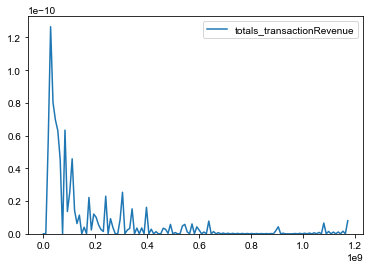

In [10]:
sns.kdeplot(df['totals_transactionRevenue'])
sns.set_style("whitegrid")
plt.show()

In [11]:
for i in ['socialEngagementType', 'totals_visits']:
    print(df[i].value_counts())

Not Socially Engaged    20000
Name: socialEngagementType, dtype: int64
1    20000
Name: totals_visits, dtype: int64


In [12]:
df['channelGrouping'].value_counts()

Organic Search    9535
Social            3455
Direct            3047
Referral          2649
Paid Search        527
Affiliates         425
Display            362
Name: channelGrouping, dtype: int64

In [13]:
ChannelGrouping = pd.get_dummies(df['channelGrouping'],columns='channelGrouping',prefix='channelGrouping')
ChannelGrouping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
channelGrouping_Affiliates        20000 non-null uint8
channelGrouping_Direct            20000 non-null uint8
channelGrouping_Display           20000 non-null uint8
channelGrouping_Organic Search    20000 non-null uint8
channelGrouping_Paid Search       20000 non-null uint8
channelGrouping_Referral          20000 non-null uint8
channelGrouping_Social            20000 non-null uint8
dtypes: uint8(7)
memory usage: 136.8 KB


****Summary****

- 'totals_bounces','totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim','totals_timeOnSite','totals_transactionRevenue','totals_transactions', 'channelGrouping' columns add value in total revenue prediction.
- *socialEngagementType*, *totals_visits* columns have constant value, hence ignored.
- Ignored *visitId*, *visitNumber*, *fullVisitorId*, *date*, *visitStartTime* columns since they doesn't add any information in predicting the outcome.
- In the below features, the cell values are of json string format. These features have been converted into dataframe of multiple columns.
    - geoNetwork
    - device
    - trafficSource
    - hits
    - customDimensions

**1) GeoNetwork Column**

In [14]:
geoNetwork = pd.io.json.json_normalize(df['geoNetwork'].apply(eval))
geoNetwork.head(2)

,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent
0,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe
1,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America


In [15]:
geoNetwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
city               20000 non-null object
cityId             20000 non-null object
continent          20000 non-null object
country            20000 non-null object
latitude           20000 non-null object
longitude          20000 non-null object
metro              20000 non-null object
networkDomain      20000 non-null object
networkLocation    20000 non-null object
region             20000 non-null object
subContinent       20000 non-null object
dtypes: object(11)
memory usage: 1.7+ MB


In [16]:
a = geoNetwork['country'].value_counts()
b = geoNetwork['country'].isin(a.index[a<200])
geoNetwork.loc[b, 'country'] = 'Others'

In [17]:
geo_Ctry = geoNetwork['country'].value_counts()

In [18]:
c = geoNetwork['subContinent'].value_counts()
d = geoNetwork['subContinent'].isin(c.index[c<100])
geoNetwork.loc[d, 'subContinent'] = 'Others'

In [19]:
geo_Ntwrk =geoNetwork['subContinent'].value_counts()

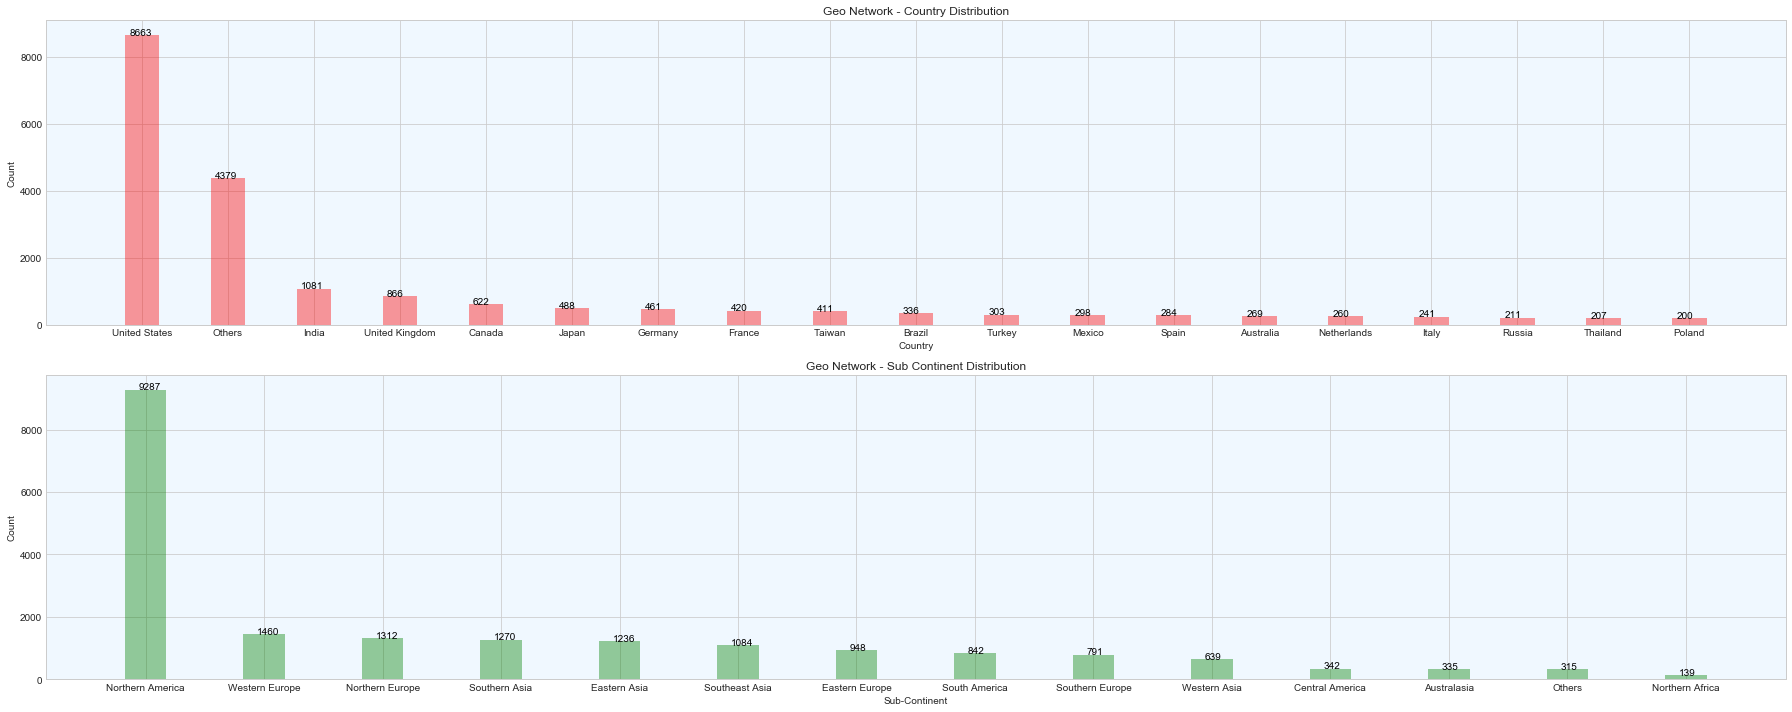

In [20]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(25,10),sharex=False, sharey=False)
index1 = geo_Ctry.index.unique()
index2 = geo_Ntwrk.index.unique()
y_pos1 = np.arange(len(index1))
y_pos2 = np.arange(len(index2))
bar_width=0.4
bar_width2=0.35
opacity=0.4
# Total Count
ax1.bar(y_pos1, geo_Ctry.values,bar_width,align='center',color='red',alpha=opacity)
ax1.set_xticks(y_pos1)
ax1.set_xticklabels(geo_Ctry.index)
for i,j in zip(y_pos1,geo_Ctry.values):
    ax1.annotate(str(j),xy=(i-0.15,j),color='black')
#ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_facecolor('aliceblue')
ax1.set_ylabel('Count')
ax1.set_xlabel('Country')
ax1.set_title('Geo Network - Country Distribution')
# Non Zero Revenue Count
ax2.bar(y_pos2, geo_Ntwrk.values,bar_width2,align='center',color='green',alpha=opacity)
ax2.set_xticks(y_pos2)
ax2.set_xticklabels(geo_Ntwrk.index)
for i,j in zip(y_pos1,geo_Ntwrk.values):
    ax2.annotate(str(j),xy=(i-0.06,j),color='black')
ax2.set_xlabel('Sub-Continent')
ax2.set_ylabel('Count')

ax2.set_title('Geo Network - Sub Continent Distribution')
ax2.set_facecolor('aliceblue')
plt.tight_layout()
plt.show()

It can be seen from the above graph that Northern America Subcontinent has highest count and within Northern America, United States records the most number of customers visiting G-store.

In [21]:
for i in ['latitude', 'longitude', 'networkLocation']:
    print(i + " column values : " + geoNetwork[i].unique())

['latitude column values : not available in demo dataset']
['longitude column values : not available in demo dataset']
['networkLocation column values : not available in demo dataset']


In [22]:
for i in ['networkDomain', 'city', 'region', 'metro']:
    print(geoNetwork[i].value_counts().nlargest(2))
    print("# Unique Values :" + str(geoNetwork[i].nunique()))

(not set)          5849
unknown.unknown    2937
Name: networkDomain, dtype: int64
# Unique Values :2516
not available in demo dataset    11342
Mountain View                      942
Name: city, dtype: int64
# Unique Values :162
not available in demo dataset    11342
California                        2542
Name: region, dtype: int64
# Unique Values :125
not available in demo dataset    11342
(not set)                         4020
Name: metro, dtype: int64
# Unique Values :32


****Summary****
- *country* and *subContinent* columns provide information in predicting total revenue.
    - Countries having count less than 200 are marked as 'Others' in 'country' column.
    - Subcontinents having count less than 100 are marked as 'Others' in 'subContinent' column.
- Since *continent* provides same amount of information as *subContinent*, it is ignored.
- *latitude*, *longitude*, *networkLocation* columns have constant value('not available in demo dataset'), hence ignored.
- *networkDomain*, *city*, *region*, *metro* columns have more than 50% of unknown values, hence ignored.
- Ignored *cityId* since it doesn't add any information in predicting outcome.

*Creating Dummy Variables for 'country' and 'subContinent' columns*

In [23]:
SubContinent = pd.get_dummies(geoNetwork['subContinent'],columns='subContinent',prefix='subContinent')
SubContinent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
subContinent_Australasia         20000 non-null uint8
subContinent_Central America     20000 non-null uint8
subContinent_Eastern Asia        20000 non-null uint8
subContinent_Eastern Europe      20000 non-null uint8
subContinent_Northern Africa     20000 non-null uint8
subContinent_Northern America    20000 non-null uint8
subContinent_Northern Europe     20000 non-null uint8
subContinent_Others              20000 non-null uint8
subContinent_South America       20000 non-null uint8
subContinent_Southeast Asia      20000 non-null uint8
subContinent_Southern Asia       20000 non-null uint8
subContinent_Southern Europe     20000 non-null uint8
subContinent_Western Asia        20000 non-null uint8
subContinent_Western Europe      20000 non-null uint8
dtypes: uint8(14)
memory usage: 273.5 KB


In [24]:
Country = pd.get_dummies(geoNetwork['country'],columns='country',prefix='country')
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
country_Australia         20000 non-null uint8
country_Brazil            20000 non-null uint8
country_Canada            20000 non-null uint8
country_France            20000 non-null uint8
country_Germany           20000 non-null uint8
country_India             20000 non-null uint8
country_Italy             20000 non-null uint8
country_Japan             20000 non-null uint8
country_Mexico            20000 non-null uint8
country_Netherlands       20000 non-null uint8
country_Others            20000 non-null uint8
country_Poland            20000 non-null uint8
country_Russia            20000 non-null uint8
country_Spain             20000 non-null uint8
country_Taiwan            20000 non-null uint8
country_Thailand          20000 non-null uint8
country_Turkey            20000 non-null uint8
country_United Kingdom    20000 non-null uint8
country_United States     20000 non-null uint

**2) Device Column**

In [25]:
device = pd.io.json.json_normalize(df['device'].apply(eval))
device.head(2)

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [26]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
browser                      20000 non-null object
browserSize                  20000 non-null object
browserVersion               20000 non-null object
deviceCategory               20000 non-null object
flashVersion                 20000 non-null object
isMobile                     20000 non-null bool
language                     20000 non-null object
mobileDeviceBranding         20000 non-null object
mobileDeviceInfo             20000 non-null object
mobileDeviceMarketingName    20000 non-null object
mobileDeviceModel            20000 non-null object
mobileInputSelector          20000 non-null object
operatingSystem              20000 non-null object
operatingSystemVersion       20000 non-null object
screenColors                 20000 non-null object
screenResolution             20000 non-null object
dtypes: bool(1), object(15)
memory usage: 2.3+ MB


In [27]:
df_device = pd.concat([df, device],axis=1)

In [28]:
# Device Browser
df_brwsr = df_device.groupby(['browser'])['totals_totalTransactionRevenue'].agg(['size','count']).sort_values(by="size",ascending=False)
df_brwsr.columns =["total revenue record count","count of non zero revenue"]
df_brwsr.fillna(value=0,inplace=True)
df_brwsr
# Device Category
df_catgry = df_device.groupby(['deviceCategory'])['totals_totalTransactionRevenue'].agg(['size','count']).sort_values(by="size",ascending=False)
df_catgry.columns =["total revenue record count","count of non zero revenue"]
df_catgry.fillna(value=0,inplace=True)
df_catgry
# Device OS
df_os = df_device.groupby(['operatingSystem'])['totals_totalTransactionRevenue'].agg(['size','count']).sort_values(by="size",ascending=False)
df_os.columns =["total revenue record count","count of non zero revenue"]
df_os.fillna(value=0,inplace=True)

In [29]:
def device_barplots(df,title):
    %matplotlib inline
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(30,8),sharey=False,facecolor='silver')
    index = df.index.unique()
    y_pos = np.arange(len(index))
    bar_width=0.7
    # Total Count
    ax1.barh(y_pos, df['total revenue record count'],bar_width,align='center',color='black',alpha=0.5)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(df.index)
    ax1.invert_yaxis()  # labels read top-to-bottom
   # ax1.set_xlabel('Performance')
    ax1.set_title('Total Revenue record count by '+title)
    # Non Zero Revenue Count
    ax2.barh(y_pos, df['count of non zero revenue'],bar_width,align='center',color='slategray',alpha=0.8)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(df.index)
    ax2.invert_yaxis()  # labels read top-to-bottom
   # ax2.set_xlabel('Performance')
    ax2.set_title('Total Non Zero Revenue record count by '+title)
    plt.show()

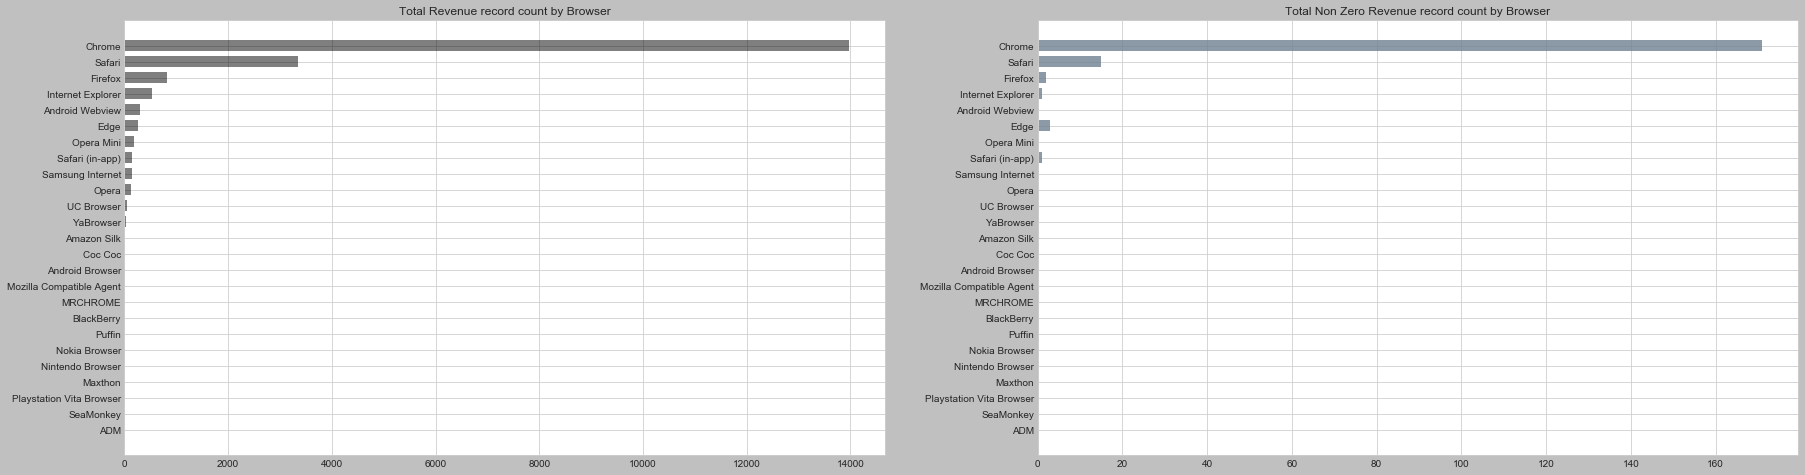

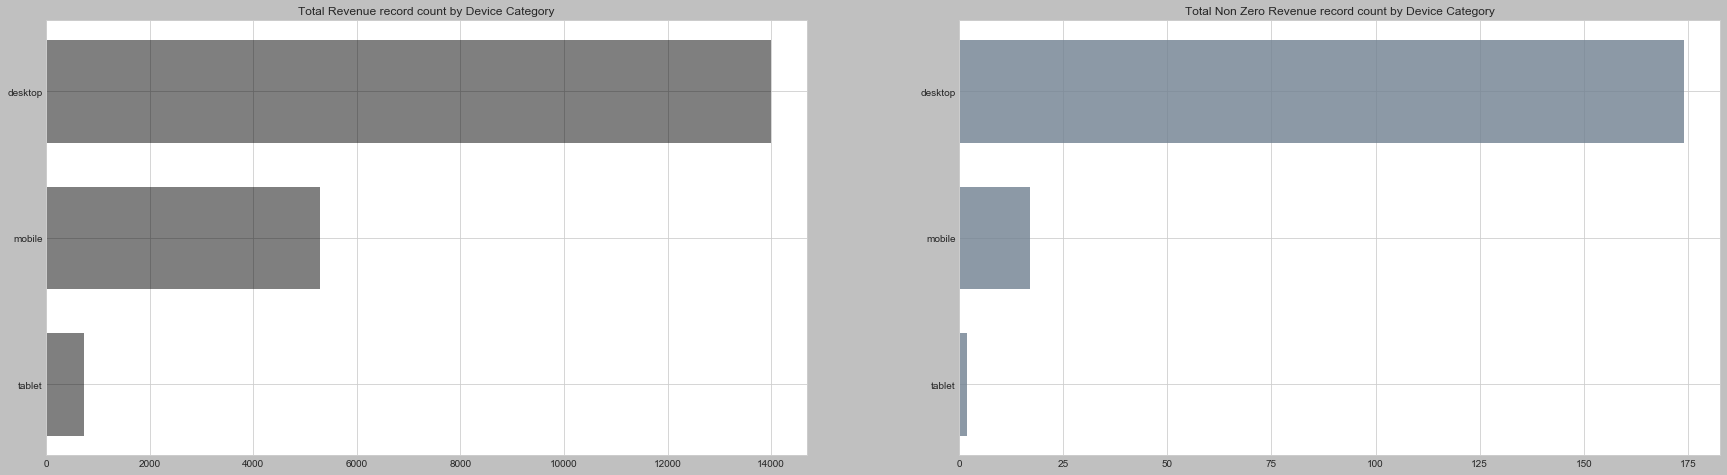

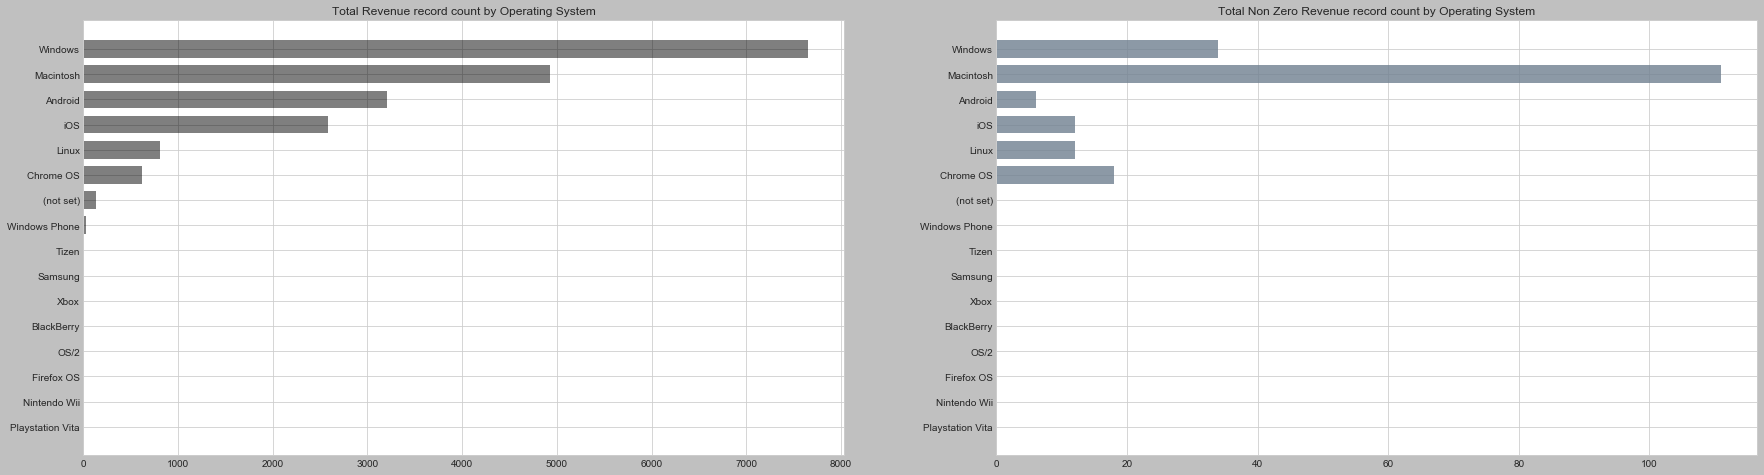

In [30]:
device_barplots(df_brwsr,'Browser')
device_barplots(df_catgry,'Device Category')
device_barplots(df_os,'Operating System')

Total Revenue record count and Total Non zero Revenue record count is highest for Chrome browser, Desktop and Windows operating system.

In [31]:
e = device['browser'].value_counts()
f = device['browser'].isin(e.index[e<200])
device.loc[f, 'browser'] = 'Others'

In [32]:
device['browser'].value_counts()

Chrome               13978
Safari                3340
Firefox                829
Others                 756
Internet Explorer      530
Android Webview        300
Edge                   267
Name: browser, dtype: int64

In [33]:
device['deviceCategory'].value_counts()

desktop    13988
mobile      5284
tablet       728
Name: deviceCategory, dtype: int64

In [34]:
g = device['operatingSystem'].value_counts()
h = device['operatingSystem'].isin(g.index[g<200])
device.loc[h, 'operatingSystem'] = 'Others'

In [35]:
device['operatingSystem'].value_counts()

Windows      7651
Macintosh    4928
Android      3205
iOS          2583
Linux         812
Chrome OS     620
Others        201
Name: operatingSystem, dtype: int64

In [36]:
for i in ['browserSize', 'browserVersion', 'flashVersion', 'language', 'mobileDeviceBranding', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel', 'mobileInputSelector', 'operatingSystemVersion', 'screenColors', 'screenResolution']:
    print(i + " column unique values : " + device[i].unique())

['browserSize column unique values : not available in demo dataset']
['browserVersion column unique values : not available in demo dataset']
['flashVersion column unique values : not available in demo dataset']
['language column unique values : not available in demo dataset']
['mobileDeviceBranding column unique values : not available in demo dataset']
['mobileDeviceInfo column unique values : not available in demo dataset']
['mobileDeviceMarketingName column unique values : not available in demo dataset']
['mobileDeviceModel column unique values : not available in demo dataset']
['mobileInputSelector column unique values : not available in demo dataset']
['operatingSystemVersion column unique values : not available in demo dataset']
['screenColors column unique values : not available in demo dataset']
['screenResolution column unique values : not available in demo dataset']


****Summary****

- *browser*, *deviceCategory* and *operatingSystem* columns provide valuable information in predicting total revenue.
    - Browsers and Operating systems having count less than 200 are marked as 'Others' in 'browser' and 'operatingSystem' columns.
- Since *isMobile* column provides same information as *deviceCategory*, it is ignored.
- browserSize, browserVersion, flashVersion, language, mobileDeviceBranding, mobileDeviceInfo, mobileDeviceMarketingName, mobileDeviceModel, mobileInputSelector, operatingSystemVersion, screenColors, screenResolution columns have constant value('not available in demo dataset'), hence ignored.

*Creating Dummy Variables for 'browser', 'deviceCategory' and 'operatingSystem' columns*

In [37]:
Browser = pd.get_dummies(device['browser'],columns='browser',prefix='browser')
Browser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
browser_Android Webview      20000 non-null uint8
browser_Chrome               20000 non-null uint8
browser_Edge                 20000 non-null uint8
browser_Firefox              20000 non-null uint8
browser_Internet Explorer    20000 non-null uint8
browser_Others               20000 non-null uint8
browser_Safari               20000 non-null uint8
dtypes: uint8(7)
memory usage: 136.8 KB


In [38]:
DeviceCategory = pd.get_dummies(device['deviceCategory'],columns='deviceCategory',prefix='deviceCategory')
DeviceCategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
deviceCategory_desktop    20000 non-null uint8
deviceCategory_mobile     20000 non-null uint8
deviceCategory_tablet     20000 non-null uint8
dtypes: uint8(3)
memory usage: 58.7 KB


In [39]:
OperatingSystem = pd.get_dummies(device['operatingSystem'],columns='operatingSystem',prefix='operatingSystem')
OperatingSystem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
operatingSystem_Android      20000 non-null uint8
operatingSystem_Chrome OS    20000 non-null uint8
operatingSystem_Linux        20000 non-null uint8
operatingSystem_Macintosh    20000 non-null uint8
operatingSystem_Others       20000 non-null uint8
operatingSystem_Windows      20000 non-null uint8
operatingSystem_iOS          20000 non-null uint8
dtypes: uint8(7)
memory usage: 136.8 KB


**3) Traffic Source**

In [40]:
trafficSource = pd.io.json.json_normalize(df['trafficSource'].apply(eval))
trafficSource.head(2)

,adContent,adwordsClickInfo.adNetworkType,adwordsClickInfo.criteriaParameters,adwordsClickInfo.gclId,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,isTrueDirect,keyword,medium,referralPath,source
0,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com


In [41]:
trafficSource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
adContent                              521 non-null object
adwordsClickInfo.adNetworkType         630 non-null object
adwordsClickInfo.criteriaParameters    20000 non-null object
adwordsClickInfo.gclId                 633 non-null object
adwordsClickInfo.isVideoAd             630 non-null object
adwordsClickInfo.page                  630 non-null object
adwordsClickInfo.slot                  630 non-null object
campaign                               20000 non-null object
isTrueDirect                           6333 non-null object
keyword                                6790 non-null object
medium                                 20000 non-null object
referralPath                           6104 non-null object
source                                 20000 non-null object
dtypes: object(13)
memory usage: 2.0+ MB


In [42]:
for i in ['adwordsClickInfo.criteriaParameters']:
    print(i + " column values : " + trafficSource[i].unique())

['adwordsClickInfo.criteriaParameters column values : not available in demo dataset']


In [43]:
for i in ['campaign', 'keyword', 'referralPath']:
    print(trafficSource[i].value_counts().nlargest(1))

(not set)    19058
Name: campaign, dtype: int64
(not provided)    6131
Name: keyword, dtype: int64
/    1709
Name: referralPath, dtype: int64


In [44]:
trafficSource['source'] = trafficSource['source'].replace(['(direct)','youtube.com','analytics.google.com','google.com','sites.google.com'], ['direct','youtube','Google Analytics','google','google'])

In [45]:
i = trafficSource['source'].value_counts()
j = trafficSource['source'].isin(i.index[i<200])
trafficSource.loc[j, 'source'] = 'Others'

In [46]:
trafficSource['medium'] = trafficSource['medium'].replace('(none)','None')

In [47]:
tf1_src =pd.DataFrame(trafficSource['source'].value_counts())
tf1_medium = pd.DataFrame(trafficSource['medium'].value_counts())

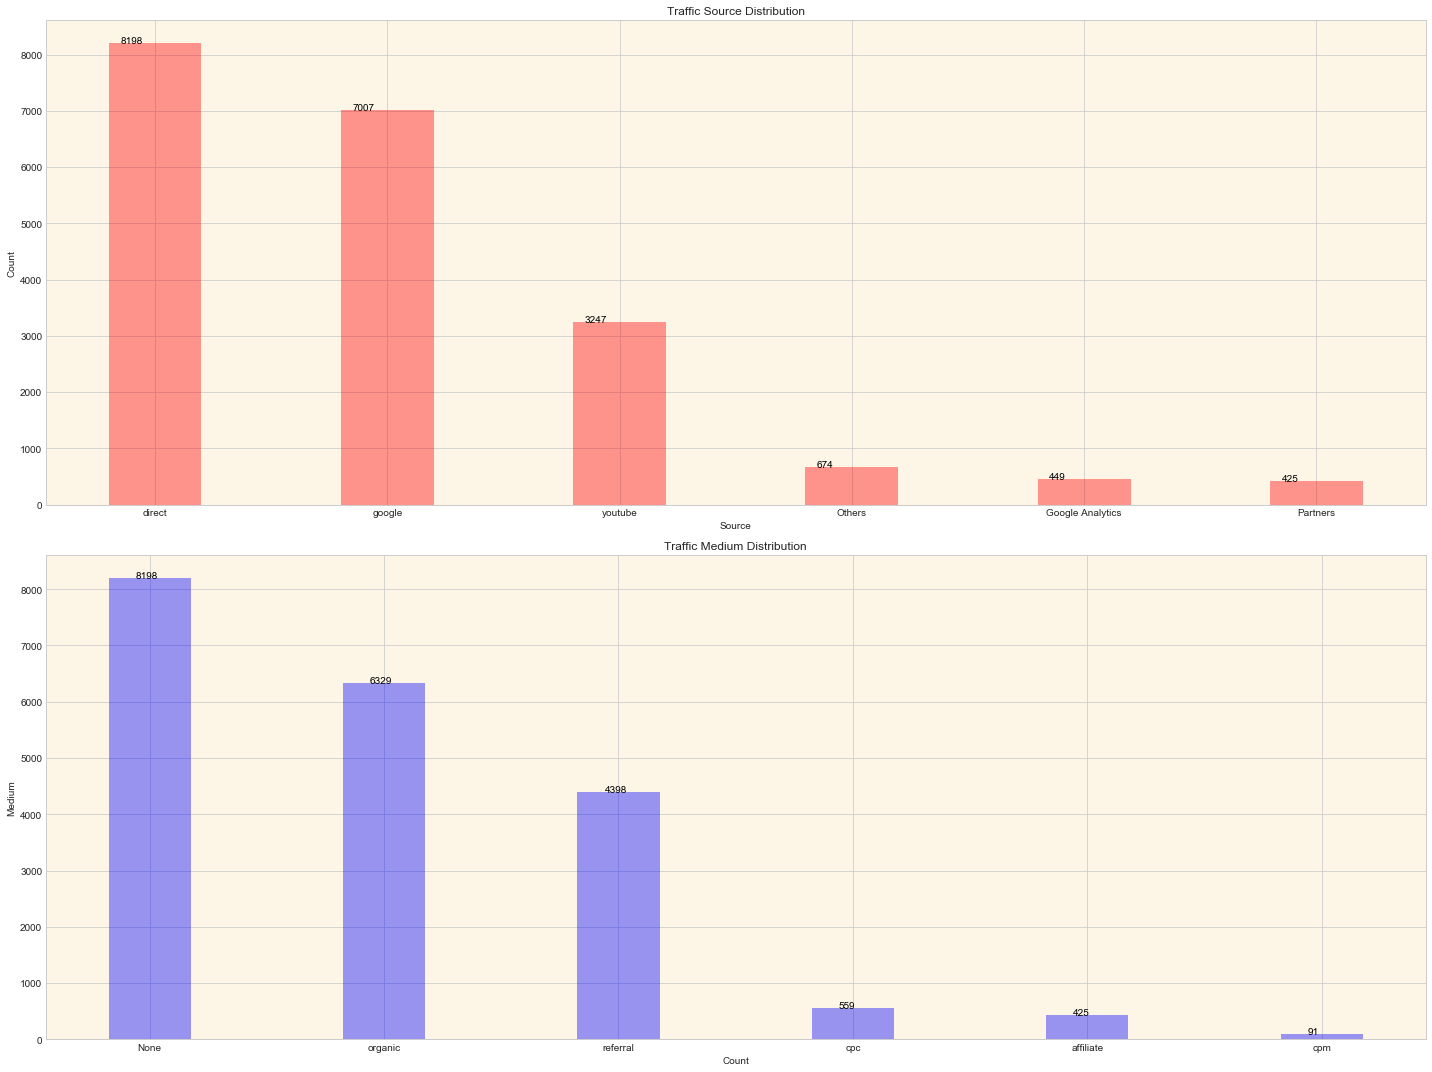

In [48]:
%matplotlib inline
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,15),sharex=False, sharey=False)
index1 = tf1_src.index.unique()
index2 = tf1_medium.index.unique()
y_pos1 = np.arange(len(index1))
y_pos2 = np.arange(len(index2))
bar_width=0.4
bar_width2=0.35
opacity=0.4
# Total Count
ax1.bar(y_pos1, tf1_src['source'],bar_width,align='center',color='red',alpha=opacity)
ax1.set_xticks(y_pos1)
ax1.set_xticklabels(tf1_src.index)
for i,j in zip(y_pos1,tf1_src['source']):
    ax1.annotate(str(j),xy=(i-0.15,j),color='black')
#ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_facecolor('oldlace')
ax1.set_ylabel('Count')
ax1.set_xlabel('Source')
ax1.set_title('Traffic Source Distribution')
# Non Zero Revenue Count
ax2.bar(y_pos2, tf1_medium['medium'],bar_width2,align='center',color='blue',alpha=opacity)
ax2.set_xticks(y_pos2)
ax2.set_xticklabels(tf1_medium.index)
for i,j in zip(y_pos1,tf1_medium['medium']):
    ax2.annotate(str(j),xy=(i-0.06,j),color='black')
ax2.set_xlabel('Count')
ax2.set_ylabel('Medium')

ax2.set_title('Traffic Medium Distribution')
ax2.set_facecolor('oldlace')
plt.tight_layout()
plt.show()

Direct source records the highest count which implies most customers visit the G-store directly. Medium is unknown(None) for Direct traffic. Hence, counts of Direct source and None medium matches in the above graph. 'None' will be dropped after one hot vector encoding since it provides same information as Direct.

****Summary****

- *medium* and *source* columns provide information in predicting total revenue.
    - Sources having count less than 200 are marked as 'Others' in 'source' column.
- Since *isTrueDirect* column provides same amount of information as *source*, it is ignored.
- *adwordsClickInfo.criteriaParameters* column has constant value('not available in demo dataset'), hence ignored.
- *adContent*, *adwordsClickInfo.adNetworkType*, *adwordsClickInfo.gclId*, *adwordsClickInfo.isVideoAd*, *adwordsClickInfo.page*, *adwordsClickInfo.slot* columns have more than 90% of null values, hence ignored.
- Ignored *keyword*, *referralPath*, *campaign* columns since they have more than 50% of unknown values.

*Creating Dummy Variables for 'source' and 'medium' columns*

In [49]:
Source = pd.get_dummies(trafficSource['source'],columns='source',prefix='source')
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
source_Google Analytics    20000 non-null uint8
source_Others              20000 non-null uint8
source_Partners            20000 non-null uint8
source_direct              20000 non-null uint8
source_google              20000 non-null uint8
source_youtube             20000 non-null uint8
dtypes: uint8(6)
memory usage: 117.3 KB


In [50]:
Medium = pd.get_dummies(trafficSource['medium'],columns='medium',prefix='medium')
Medium.drop(['medium_None'],axis=1,inplace=True)
Medium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
medium_affiliate    20000 non-null uint8
medium_cpc          20000 non-null uint8
medium_cpm          20000 non-null uint8
medium_organic      20000 non-null uint8
medium_referral     20000 non-null uint8
dtypes: uint8(5)
memory usage: 97.7 KB


**4) Hits Column**

In [51]:
import ast

df1 = df['hits'].copy()

df['hits']=df['hits'].apply(ast.literal_eval)

df['hits']=df['hits'].str[0]

df['hits']=df['hits'].apply(lambda x: {'index':np.NaN,'value':np.NaN} if pd.isnull(x) else x)

hits = pd.io.json.json_normalize(df['hits'])

In [52]:
hits.head()

,appInfo.exitScreenName,appInfo.landingScreenName,appInfo.screenDepth,appInfo.screenName,contentGroup.contentGroup1,contentGroup.contentGroup2,contentGroup.contentGroup3,contentGroup.contentGroup4,contentGroup.contentGroup5,contentGroup.contentGroupUniqueViews1,...,promotionActionInfo.promoIsView,publisher_infos,referer,social.hasSocialSourceReferral,social.socialInteractionNetworkAction,social.socialNetwork,time,transaction.currencyCode,type,value
0,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,shop.googlemerchandisestore.com/google+redesig...,(not set),Bags,(not set),(not set),(not set),NaN,...,NaN,[],https://www.google.co.uk/search?q=water+bottle...,No,:,(not set),0,USD,PAGE,NaN
1,shop.googlemerchandisestore.com/asearch.html,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,True,[],https://sites.google.com/a/google.com/transpor...,No,:,(not set),0,NaN,PAGE,NaN
2,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,True,[],https://www.googlemerchandisestore.com/,No,:,(not set),0,NaN,PAGE,NaN
3,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,True,[],https://www.google.com.tr/,No,:,(not set),0,NaN,PAGE,NaN
4,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,True,[],https://www.google.com.mx/,No,:,(not set),0,NaN,PAGE,NaN


In [53]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
appInfo.exitScreenName                   19994 non-null object
appInfo.landingScreenName                19994 non-null object
appInfo.screenDepth                      19994 non-null object
appInfo.screenName                       19994 non-null object
contentGroup.contentGroup1               19994 non-null object
contentGroup.contentGroup2               19994 non-null object
contentGroup.contentGroup3               19994 non-null object
contentGroup.contentGroup4               19994 non-null object
contentGroup.contentGroup5               19994 non-null object
contentGroup.contentGroupUniqueViews1    80 non-null object
contentGroup.contentGroupUniqueViews2    7069 non-null object
contentGroup.contentGroupUniqueViews3    561 non-null object
contentGroup.previousContentGroup1       19994 non-null object
contentGroup.previousContentGroup2       19994 non-null object
contentGroup.pr

In [54]:
for i in ['customDimensions', 'customMetrics','customVariables', 'experiment','publisher_infos']:
    print(i + " column values : " + hits[i].astype(str).unique())

['customDimensions column values : []'
 'customDimensions column values : nan']
['customMetrics column values : []' 'customMetrics column values : nan']
['customVariables column values : []'
 'customVariables column values : nan']
['experiment column values : []' 'experiment column values : nan']
['publisher_infos column values : []'
 'publisher_infos column values : nan']


In [55]:
for i in ['appInfo.screenDepth','contentGroup.contentGroup1','contentGroup.contentGroup3','contentGroup.contentGroup4','contentGroup.contentGroup5', 'eCommerceAction.step', 'social.socialInteractionNetworkAction']:
    print(hits[i].value_counts().nlargest(1))

0    19994
Name: appInfo.screenDepth, dtype: int64
(not set)    19914
Name: contentGroup.contentGroup1, dtype: int64
(not set)    19429
Name: contentGroup.contentGroup3, dtype: int64
(not set)    19994
Name: contentGroup.contentGroup4, dtype: int64
(not set)    19994
Name: contentGroup.contentGroup5, dtype: int64
1    19994
Name: eCommerceAction.step, dtype: int64
 :     19994
Name: social.socialInteractionNetworkAction, dtype: int64


In [56]:
for i in ['eCommerceAction.step','exceptionInfo.isFatal','isEntrance','isExit','isInteraction','item.currencyCode','transaction.currencyCode']:
    print(hits[i].value_counts().nlargest(1))

1    19994
Name: eCommerceAction.step, dtype: int64
True    19994
Name: exceptionInfo.isFatal, dtype: int64
True    19950
Name: isEntrance, dtype: int64
True    9913
Name: isExit, dtype: int64
True    19994
Name: isInteraction, dtype: int64
USD    6971
Name: item.currencyCode, dtype: int64
USD    6971
Name: transaction.currencyCode, dtype: int64


In [57]:
for i in ['contentGroup.previousContentGroup1','contentGroup.previousContentGroup2','contentGroup.previousContentGroup3','contentGroup.previousContentGroup4','contentGroup.previousContentGroup5']:
    print(hits[i].value_counts().nlargest(1))

(entrance)    19994
Name: contentGroup.previousContentGroup1, dtype: int64
(entrance)    19994
Name: contentGroup.previousContentGroup2, dtype: int64
(entrance)    19994
Name: contentGroup.previousContentGroup3, dtype: int64
(entrance)    19994
Name: contentGroup.previousContentGroup4, dtype: int64
(entrance)    19994
Name: contentGroup.previousContentGroup5, dtype: int64


In [58]:
hits['type'] = hits['type'].map({'PAGE': 1, 'EVENT': 0})
hits['type'] = hits['type'].fillna(0)
hits['type'].value_counts()

1.0    19950
0.0       50
Name: type, dtype: int64

In [59]:
hits['Source_Web'] = hits['dataSource'] == 'web'

hits['Source_Web'] = hits['Source_Web'].map({True: 1, False: 0})

In [60]:
hits['Source_Web'].value_counts() #web or not

1    11202
0     8798
Name: Source_Web, dtype: int64

In [61]:
hits['page.pagePathLevel1'] = hits['page.pagePathLevel1'].replace(['/home','/google+redesign/','/signin.html'], ['Home','Google_Redesign','SignIn'])

In [62]:
m = hits['page.pagePathLevel1'].value_counts()
n = hits['page.pagePathLevel1'].isin(m.index[m<200])
hits.loc[n, 'page.pagePathLevel1'] = 'Others'

hits['page.pagePathLevel1'] = hits['page.pagePathLevel1'].fillna('Others')

In [63]:
hits['page.pagePathLevel1'].value_counts()

Home               11806
Google_Redesign     7152
Others               656
SignIn               386
Name: page.pagePathLevel1, dtype: int64

In [64]:
hits['page.pagePathLevel2'] = hits['page.pagePathLevel2'].replace(['','/shop+by+brand/','/apparel/','/apparel','/bags','/drinkware','/electronics/'], ['None','Shop_Brand','Apparel','Apparel','Bags','Drinkware','Electronics'])

In [65]:
hits['page.pagePathLevel2'].isna().value_counts()

False    19994
True         6
Name: page.pagePathLevel2, dtype: int64

In [66]:
o = hits['page.pagePathLevel2'].value_counts()
p = hits['page.pagePathLevel2'].isin(o.index[o<200])
hits.loc[p, 'page.pagePathLevel2'] = 'Others'

hits['page.pagePathLevel2'] = hits['page.pagePathLevel2'].fillna('Others')

In [67]:
hits['page.pagePathLevel2'].value_counts()

None           12704
Shop_Brand      3537
Apparel         1887
Others          1199
Bags             239
Drinkware        220
Electronics      214
Name: page.pagePathLevel2, dtype: int64

In [68]:
hits['page.pagePathLevel3'] = hits['page.pagePathLevel3'].replace(['','/youtube','/mens','/men++s/','/mens/','/stickers/'], ['None','Youtube','Mens','Mens','Mens','Stickers'])

In [69]:
hits['page.pagePathLevel3'].isna().value_counts()

False    19994
True         6
Name: page.pagePathLevel3, dtype: int64

In [70]:
q = hits['page.pagePathLevel3'].value_counts()
r = hits['page.pagePathLevel3'].isin(q.index[q<200])
hits.loc[r, 'page.pagePathLevel3'] = 'Others'

hits['page.pagePathLevel3'] = hits['page.pagePathLevel3'].fillna('Others')

In [71]:
hits['social.hasSocialSourceReferral'] = hits['social.hasSocialSourceReferral'].map({'Yes': 1, 'No': 0})
hits['social.hasSocialSourceReferral'].value_counts()

0.0    16539
1.0     3455
Name: social.hasSocialSourceReferral, dtype: int64

In [72]:
for i in ['contentGroup.contentGroupUniqueViews1','contentGroup.contentGroupUniqueViews2','contentGroup.contentGroupUniqueViews3','promotionActionInfo.promoIsView','social.hasSocialSourceReferral']:
    hits[i] = hits[i].fillna(0)
    hits[i] = hits[i].astype(int)

In [73]:
hits['promotionActionInfo.promoIsView'] = hits['promotionActionInfo.promoIsView'].replace(True,1)
hits['promotionActionInfo.promoIsView'].value_counts()

0    14330
1     5670
Name: promotionActionInfo.promoIsView, dtype: int64

In [74]:
hits['social.socialNetwork'].value_counts().nlargest(1)

(not set)    16539
Name: social.socialNetwork, dtype: int64

In [75]:
hits_final = hits[['contentGroup.contentGroupUniqueViews1','contentGroup.contentGroupUniqueViews2','contentGroup.contentGroupUniqueViews3','Source_Web','promotionActionInfo.promoIsView','social.hasSocialSourceReferral','type']]

In [76]:
hits_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
contentGroup.contentGroupUniqueViews1    20000 non-null int32
contentGroup.contentGroupUniqueViews2    20000 non-null int32
contentGroup.contentGroupUniqueViews3    20000 non-null int32
Source_Web                               20000 non-null int64
promotionActionInfo.promoIsView          20000 non-null int64
social.hasSocialSourceReferral           20000 non-null int32
type                                     20000 non-null float64
dtypes: float64(1), int32(4), int64(2)
memory usage: 781.3 KB


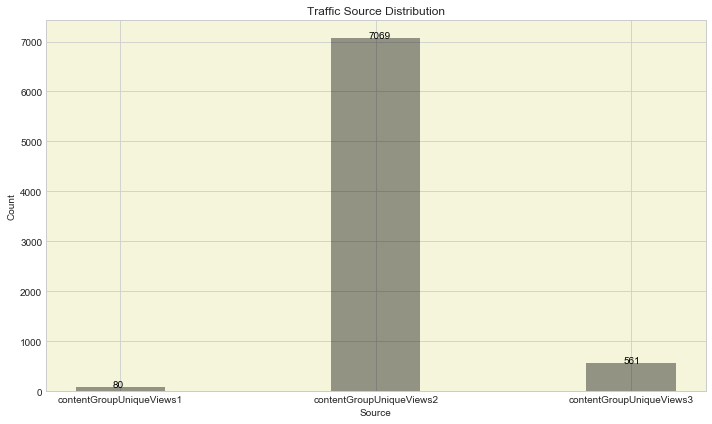

In [77]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(10,6))
a =(hits_final['contentGroup.contentGroupUniqueViews1']==1).sum()
b =(hits_final['contentGroup.contentGroupUniqueViews2']==1).sum()
c =(hits_final['contentGroup.contentGroupUniqueViews3']==1).sum()
lst=[]
lst.extend((a,b,c))
bar_width=0.35
opacity=0.4
objects = ('contentGroupUniqueViews1', 'contentGroupUniqueViews2', 'contentGroupUniqueViews3')
y_pos = np.arange(len(objects))
# Total Count
ax.bar(y_pos, lst,bar_width,align='center',color='black',alpha=opacity)
ax.set_xticks(y_pos)
ax.set_xticklabels(objects)
for i,j in zip(y_pos,lst):
    ax.annotate(str(j),xy=(i-0.03,j),color='black')
#ax1.invert_yaxis()  # labels read top-to-bottom
ax.set_facecolor('beige')
ax.set_ylabel('Count')
ax.set_xlabel('Source')
ax.set_title('Traffic Source Distribution')
plt.tight_layout()
plt.show()

Unique views can be understood as user sessions per page, with each session potentially representing multiple views of the page but a minimum of one view per session. Hence, most of the customers in the dataset have visited a page twice and small portion of customers have visited a page thrice.

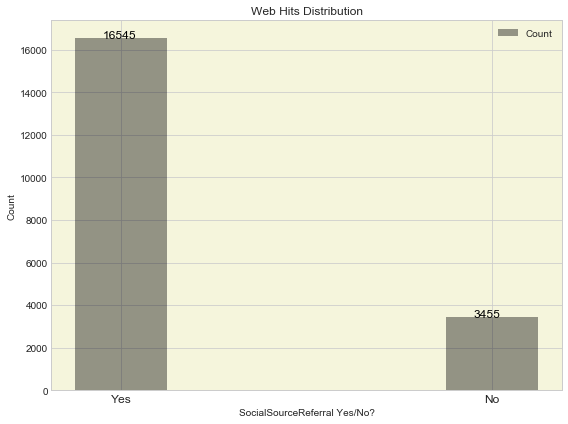

In [78]:
df_summ = hits_final['social.hasSocialSourceReferral'].value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,facecolor='beige')
code=['Yes','No']
index = df_summ.index.unique()
y_pos = np.arange(len(index))
bar_width=0.25
opacity=0.4
plt.bar(y_pos,df_summ.values,bar_width,alpha=opacity,color='black',label='Count')
for i,j in zip(y_pos,df_summ.values):
    ax.annotate(str(j),xy=(i-0.05,j),color='black',fontsize=12)
plt.title("Web Hits Distribution",fontsize=12)
plt.xticks(y_pos,code,fontsize=12)
plt.xlabel('SocialSourceReferral Yes/No?')
plt.ylabel('Count')
plt.tight_layout()
plt.legend()
plt.show()

In [79]:
import simplejson as json

hits_columns = pd.io.json.json_normalize(df1.apply(complex_replace))
ProductCategory = hits_columns['v2ProductCategory'].apply(pd.Series)


In [80]:
ProductCategory[0] = ProductCategory[0].replace(['Home/Shop by Brand/YouTube/','Home/Shop by Brand/Android/','Home/Shop by Brand/Google/','(not set)'],['Shop_By_Brand','Shop_By_Brand','Shop_By_Brand','Others'])

In [81]:
ProductCategory[0] = ProductCategory[0].replace(['Wearables/Men_s T-Shirts/','Home/Apparel/Men_s/Men_s-Performance Wear/','Home/Apparel/Men_s/Men_s-T-Shirts/','Home/Apparel/Headgear/','Home/Apparel/Men_s/','Home/Apparel/','Home/Apparel/Men_s/Men_s-Outerwear/'],'Mens Apparel')

In [82]:
ProductCategory[0] = ProductCategory[0].replace(['Home/Apparel/Kid_s/','Home/Apparel/Kid_s/Kid_s-Infant/','Apparel','Home/Apparel/Women_s/Women_s-T-Shirts/','Home/Apparel/Women_s/','Home/Apparel/Women_s/Women_s-Outerwear/','Home/Apparel/Women_s/Women_s-Performance Wear/'],'Womens/Kids Apparel')

In [83]:
ProductCategory[0] = ProductCategory[0].replace(['Home/Drinkware/','Home/Drinkware/Mugs and Cups/','Home/Drinkware/Water Bottles and Tumblers/'],'Drinkware')

In [84]:
u = ProductCategory[0].value_counts()
v = ProductCategory[0].isin(u.index[u<570])
ProductCategory.loc[v, 0] = 'Accesories/Electronics'

ProductCategory[0] = ProductCategory[0].fillna('Others')

****Summary****

- *page.pagePathLevel1*, *page.pagePathLevel2*, *page.pagePathLevel3*, *dataSource*, *contentGroup.contentGroupUniqueViews1*, *contentGroup.contentGroupUniqueViews2*, *contentGroup.contentGroupUniqueViews3*, *promotionActionInfo.promoIsView*, *social.hasSocialSourceReferral*, *type* columns provide information in predicting total revenue.
- Since *hitNumber* column provides same amount of information as *totals_hits* column in main dataframe(df), it is ignored.
- eventInfo.eventAction, eventInfo.eventCategory, eventInfo.eventLabel, index, page.searchCategory, page.searchKeyword, promotionActionInfo.promoIsClick, value columns have more than 90% of null values, hence ignored.
- 'customDimensions', 'customMetrics','customVariables', 'experiment','publisher_infos' columns have values ([],'nan'), hence ignored.
- 'appInfo.screenDepth', 'contentGroup.contentGroup1', 'contentGroup.contentGroup2', 'contentGroup.contentGroup3', 'contentGroup.contentGroup4', 'contentGroup.contentGroup5', 'social.socialInteractionNetworkAction', 'eCommerceAction.step', 'exceptionInfo.isFatal', 'isEntrance', 'isExit', 'isInteraction', 'item.currencyCode', 'transaction.currencyCode', 'contentGroup.previousContentGroup1', 'contentGroup.previousContentGroup2', 'contentGroup.previousContentGroup3', 'contentGroup.previousContentGroup4', 'contentGroup.previousContentGroup5', 'page.hostname' columns have constant values, hence ignored.
- 'hour', 'minute', 'time' 'promotion', 'eCommerceAction.action_type' columns can be ignored as they don't provide any information to predict the outcome.
- 'social.socialNetwork' is ignored as it has more than 70% of unknown values.
- 'appInfo.exitScreenName', 'appInfo.landingScreenName', 'appInfo.screenName', 'page.pagePath', 'page.pageTitle' columns provide same information as 'pagePathLevels' and 'productCategory', hence ignored.


*Creating Dummy Variables for 'page.pagePathLevel1', 'page.pagePathLevel2', 'page.pagePathLevel3', 'ProductCategory' columns*

In [85]:
pagePathLevel1 = pd.get_dummies(hits['page.pagePathLevel1'],columns='page.pagePathLevel1',prefix='pagePathLevel1')
pagePathLevel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
pagePathLevel1_Google_Redesign    20000 non-null uint8
pagePathLevel1_Home               20000 non-null uint8
pagePathLevel1_Others             20000 non-null uint8
pagePathLevel1_SignIn             20000 non-null uint8
dtypes: uint8(4)
memory usage: 78.2 KB


In [86]:
pagePathLevel2 = pd.get_dummies(hits['page.pagePathLevel2'],columns='page.pagePathLevel2',prefix='pagePathLevel2')
pagePathLevel2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
pagePathLevel2_Apparel        20000 non-null uint8
pagePathLevel2_Bags           20000 non-null uint8
pagePathLevel2_Drinkware      20000 non-null uint8
pagePathLevel2_Electronics    20000 non-null uint8
pagePathLevel2_None           20000 non-null uint8
pagePathLevel2_Others         20000 non-null uint8
pagePathLevel2_Shop_Brand     20000 non-null uint8
dtypes: uint8(7)
memory usage: 136.8 KB


In [87]:
pagePathLevel3 = pd.get_dummies(hits['page.pagePathLevel3'],columns='page.pagePathLevel3',prefix='pagePathLevel3')
pagePathLevel3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
pagePathLevel3_Mens       20000 non-null uint8
pagePathLevel3_None       20000 non-null uint8
pagePathLevel3_Others     20000 non-null uint8
pagePathLevel3_Youtube    20000 non-null uint8
dtypes: uint8(4)
memory usage: 78.2 KB


In [88]:
ProductCat = pd.get_dummies(ProductCategory[0],columns=0,prefix='ProductCategory')
ProductCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
ProductCategory_Accesories/Electronics    20000 non-null uint8
ProductCategory_Drinkware                 20000 non-null uint8
ProductCategory_Mens Apparel              20000 non-null uint8
ProductCategory_Others                    20000 non-null uint8
ProductCategory_Shop_By_Brand             20000 non-null uint8
ProductCategory_Womens/Kids Apparel       20000 non-null uint8
dtypes: uint8(6)
memory usage: 117.3 KB


**5) Custom Dimensions Column**

In [89]:
df['customDimensions'] = df['customDimensions'].str.replace('\'','"')

In [90]:
z = df['customDimensions'].to_json(orient='records')
z2 = z.replace('\\','').replace('"[]"','{}').replace('"[','').replace(']"','')

In [91]:
customDimensions = pd.read_json(z2, orient='records')

In [92]:
customDimensions['value'].value_counts()

North America      9288
EMEA               3775
APAC               2566
South America       468
Central America     298
Name: value, dtype: int64

In [93]:
CustomDim = pd.get_dummies(customDimensions['value'],columns='value',prefix='customDimensions')
CustomDim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
customDimensions_APAC               20000 non-null uint8
customDimensions_Central America    20000 non-null uint8
customDimensions_EMEA               20000 non-null uint8
customDimensions_North America      20000 non-null uint8
customDimensions_South America      20000 non-null uint8
dtypes: uint8(5)
memory usage: 97.7 KB


**Merging all the dataframes**

In [94]:
dataframe = df_final.join([ChannelGrouping, SubContinent, Country, Browser, DeviceCategory, OperatingSystem, Source, Medium, hits_final, pagePathLevel1, pagePathLevel2, pagePathLevel3, ProductCat, CustomDim])

In [95]:
dataframe = dataframe.astype(int)

In [96]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 109 entries, totals_bounces to customDimensions_South America
dtypes: int32(109)
memory usage: 8.3 MB


#### _Evaluation Strategy_

**Accuracy Score ($R^2$)** - Percentage of variance in the dependent variable explained by all the features. $R^2$ lies in a range between 0 and 1 with values closer to 1 indicating a very good model fit

In [97]:
X = dataframe.copy()
X = X.drop('totals_transactionRevenue',axis=1)
Y = dataframe['totals_transactionRevenue']

#### _Train-Test Split and Scaling_

- Splitting the sample dataset into train set (80%) and test set (20%)

- Applying **MinMaxScaler()** on train and test sets to scale the column values between 0 and 1. MinMaxScaler() reduces skewness but doesn't remove it. Since the column values are in the range of 0 to 1, the results will be consistent.

In [98]:
from sklearn.model_selection import train_test_split
X_train_S, X_test_S, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 10)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_S)
X_test = scaler.transform(X_test_S)

#### Method for plotting Train and Test Scores

In [100]:
def grid_train_test_plot(df,col,train,test,title,xlabel,ylabel,width,height,flag):
    fig = plt.figure(figsize=(width,height))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111,facecolor='white')
    ax.plot(df[col], df[train], c = 'g', linewidth=2, alpha=0.7,label='Train Accuracy Score')
    ax.plot(df[col], df[test], c = 'b',linewidth=2, alpha=0.7,label='Test Accuracy Score')
    ax.scatter(df[col], df[train], c = 'g', alpha=0.7,label='Train Accuracy Score')
    ax.scatter(df[col], df[test], c = 'b',alpha=0.7,label='Test Accuracy Score')
    if(flag=='show'):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
    ax.legend()
    plt.grid(zorder=0)
    ax.set_title(title,fontsize=20,weight='bold')
    ax.set_xlabel(xlabel,fontsize=10,weight='bold')
    ax.set_ylabel(ylabel,fontsize=10,weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    plt.show()

### Supervised Learning Models

### Grid Search, Cross Validation with Ridge Regression

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridgreg = Ridge(random_state=2)
ridge_parameters = {'alpha':[0.001,0.01,0.1,0.5,1,10,100],'fit_intercept':[True,False],'normalize':[True,False]}

ridgreg_grid_search = GridSearchCV(ridgreg, ridge_parameters, cv=5, return_train_score=True, n_jobs = -1, verbose=2)
ridgreg_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(ridgreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ridgreg_grid_search.best_score_))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.3s finished


Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.33


In [102]:
ridgregresults = pd.DataFrame(ridgreg_grid_search.cv_results_)
ridgregresults['identifier_name'] = ridgregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
ridgregresults['identifier'] = (ridgregresults.index)

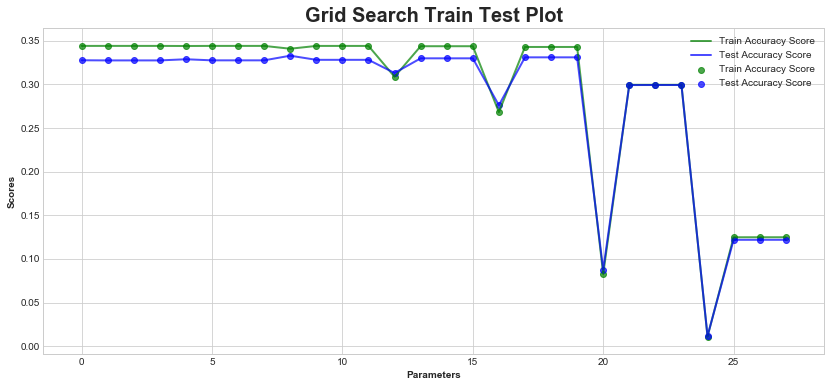

In [103]:
grid_train_test_plot(ridgregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')

In [104]:
ridgregresults[['identifier','identifier_name']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
identifier,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
identifier_name,"'alpha': 0.001, 'fit_intercept': True, 'normal...","'alpha': 0.001, 'fit_intercept': True, 'normal...","'alpha': 0.001, 'fit_intercept': False, 'norma...","'alpha': 0.001, 'fit_intercept': False, 'norma...","'alpha': 0.01, 'fit_intercept': True, 'normali...","'alpha': 0.01, 'fit_intercept': True, 'normali...","'alpha': 0.01, 'fit_intercept': False, 'normal...","'alpha': 0.01, 'fit_intercept': False, 'normal...","'alpha': 0.1, 'fit_intercept': True, 'normaliz...","'alpha': 0.1, 'fit_intercept': True, 'normaliz...",...,"'alpha': 1, 'fit_intercept': False, 'normalize...","'alpha': 1, 'fit_intercept': False, 'normalize...","'alpha': 10, 'fit_intercept': True, 'normalize...","'alpha': 10, 'fit_intercept': True, 'normalize...","'alpha': 10, 'fit_intercept': False, 'normaliz...","'alpha': 10, 'fit_intercept': False, 'normaliz...","'alpha': 100, 'fit_intercept': True, 'normaliz...","'alpha': 100, 'fit_intercept': True, 'normaliz...","'alpha': 100, 'fit_intercept': False, 'normali...","'alpha': 100, 'fit_intercept': False, 'normali..."


In [105]:
ridgreg_accuracy_train = ridgreg_grid_search.best_estimator_.score(X_train, y_train)
ridgreg_accuracy_test = ridgreg_grid_search.best_estimator_.score(X_test, y_test)

print('Ridge Regression - Train Accuracy: %.2f'%ridgreg_accuracy_train)
print('Ridge Regression - Test Accuracy: %.2f '%ridgreg_accuracy_test)

Ridge Regression - Train Accuracy: 0.34
Ridge Regression - Test Accuracy: 0.23 


In [106]:
report_table = [['Ridge Regression', str(ridgreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),ridgreg_accuracy_train,ridgreg_accuracy_test ]]

### Grid Search, Cross Validation with SGD Regression

In [107]:
from sklearn.linear_model import SGDRegressor
sgdreg=SGDRegressor(random_state=2)
sgd_parameters = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'], 'penalty':[None,'l2','l1','elasticnet'],'alpha':[0.0001,0.001,0.01,0.05,0.1,1,10],'learning_rate':['constant','optimal','invscaling'] }

sgdreg_grid_search = GridSearchCV(sgdreg, sgd_parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=2)
sgdreg_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(sgdreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(sgdreg_grid_search.best_score_))

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  1.4min finished


Best parameters: {'alpha': 10, 'learning_rate': 'constant', 'loss': 'squared_epsilon_insensitive', 'penalty': 'l1'}
Best cross-validation score: 0.29


In [108]:
sgdreg_accuracy_train = sgdreg_grid_search.best_estimator_.score(X_train, y_train)
sgdreg_accuracy_test = sgdreg_grid_search.best_estimator_.score(X_test, y_test)

print('SGD Regression - Train Accuracy: %.2f'%sgdreg_accuracy_train)
print('SGD Regression - Test Accuracy: %.2f '%sgdreg_accuracy_test)

SGD Regression - Train Accuracy: 0.26
SGD Regression - Test Accuracy: 0.15 


In [109]:
report_table = report_table + [['SGD Regression', str(sgdreg_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),sgdreg_accuracy_train,sgdreg_accuracy_test ]]

### Unsupervised Learning Models

### k-Means Clustering

In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

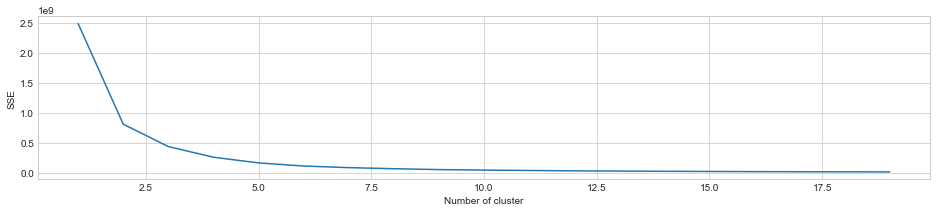

In [111]:
plt.figure(figsize=(16,3))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.grid(True)
plt.ylabel("SSE")
plt.show()

From the above plot, it can be seen that the optimal number of clusters is 3.

In [112]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(X)

In [113]:
df_final['clusters'] = kmeans.labels_

In [114]:
df_final['clusters'].value_counts()

0    18084
1     1528
2      388
Name: clusters, dtype: int64

In [115]:
df_final.groupby(['clusters']).mean()

,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions
clusters,,,,,,,,
0,0.545952,3.192767,0.769244,2.769465,1.096162,44.425570,1.954855e+05,0.002267
1,0.000000,18.183901,0.625000,14.041885,10.855366,703.603403,9.086603e+06,0.087042
2,0.000000,26.716495,0.572165,20.329897,10.902062,2037.724227,9.205902e+06,0.077320


Cluster 0 -- Customers in this group contribute to highest bounce rate(percentage of single page visits), low hits, low page views and sessions. They spend less time on site and generate low transactional revenue.

Cluster 1 -- Customers in this group contribute to average number of hits, average number of page views and sessions. They spend good amount of time on site and generate high transactional revenue.

Cluster 2 -- Customers in this group contribute to high hits, high page views and sessions. They spend large amount of time on site and generate highest transactional revenue among the other two clusters.

### Principal Component Analysis

In [116]:
X_scaled = scaler.fit_transform(X)

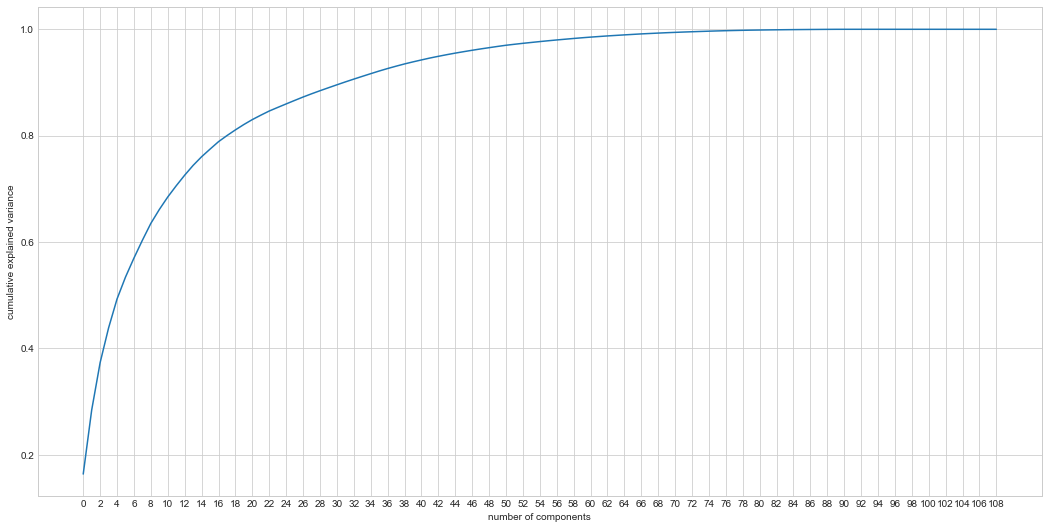

In [117]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
plt.figure(figsize=(18,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks(np.arange(0, len(np.cumsum(pca.explained_variance_ratio_)), 2))
plt.ylabel('cumulative explained variance')
plt.grid(True)

In [118]:
Num_Components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
Num_Components

44

From the above plot, it can be seen that the optimal number of components is 44.

In [119]:
pca = PCA(n_components=Num_Components)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [120]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state = 10)

### Ridge Regression - After Dimensionality Reduction using PCA

In [121]:
ridgreg_pca_grid_search = GridSearchCV(ridgreg, ridge_parameters, cv=5, return_train_score=True, n_jobs = -1, verbose=2)
ridgreg_pca_grid_search.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(ridgreg_pca_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(ridgreg_pca_grid_search.best_score_))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s


Best parameters: {'alpha': 0.5, 'fit_intercept': True, 'normalize': True}
Best cross-validation score: 0.01


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.3s finished


In [122]:
pca_ridgregresults = pd.DataFrame(ridgreg_pca_grid_search.cv_results_)
pca_ridgregresults['identifier_name'] = pca_ridgregresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
pca_ridgregresults['identifier'] = (pca_ridgregresults.index)

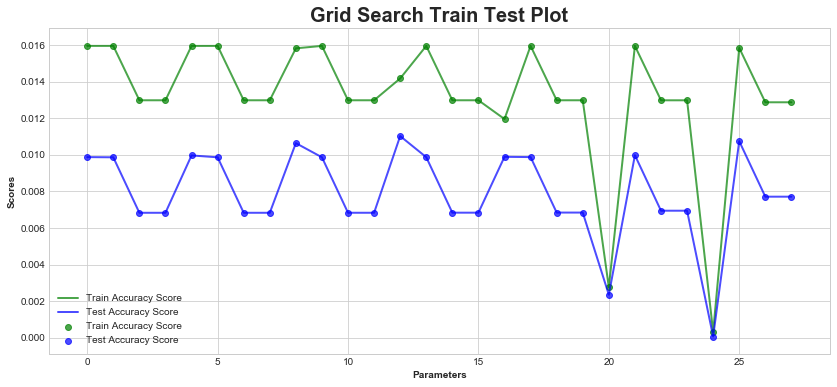

In [123]:
grid_train_test_plot(pca_ridgregresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')

In [124]:
ridgreg_pca_accuracy_train = ridgreg_pca_grid_search.best_estimator_.score(X_train_pca, y_train_pca)
ridgreg_pca_accuracy_test = ridgreg_pca_grid_search.best_estimator_.score(X_test_pca, y_test_pca)

print('Ridge Regression - Train Accuracy: %.2f'%ridgreg_pca_accuracy_train)
print('Ridge Regression - Test Accuracy: %.2f '%ridgreg_pca_accuracy_test)

Ridge Regression - Train Accuracy: 0.01
Ridge Regression - Test Accuracy: 0.01 


In [125]:
report_table = report_table + [['Ridge Regression After PCA', str(ridgreg_pca_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),ridgreg_pca_accuracy_train,ridgreg_pca_accuracy_test ]]

### SGD Regression - After Dimensionality Reduction using PCA

In [126]:
sgdreg_pca_grid_search = GridSearchCV(sgdreg, sgd_parameters, cv=5, return_train_score=True, n_jobs = -1,verbose=2)
sgdreg_pca_grid_search.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(sgdreg_pca_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(sgdreg_pca_grid_search.best_score_))

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 1243 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1673 out of 1680 | elapsed:   36.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:   36.7s finished


Best parameters: {'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'penalty': 'elasticnet'}
Best cross-validation score: 0.01


In [127]:
sgdreg_pca_accuracy_train = sgdreg_pca_grid_search.best_estimator_.score(X_train_pca, y_train_pca)
sgdreg_pca_accuracy_test = sgdreg_pca_grid_search.best_estimator_.score(X_test_pca, y_test_pca)

print('SGD Regression - Train Accuracy: %.2f'%sgdreg_pca_accuracy_train)
print('SGD Regression - Test Accuracy: %.2f '%sgdreg_pca_accuracy_test)

SGD Regression - Train Accuracy: 0.01
SGD Regression - Test Accuracy: 0.01 


In [128]:
report_table = report_table + [['SGD Regression After PCA', str(sgdreg_pca_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''),sgdreg_pca_accuracy_train,sgdreg_pca_accuracy_test ]]

In [129]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 'Train Accuracy', 'Test Accuracy'])
report.index = report['Model Name']
report.drop(['Model Name'], axis=1,inplace=True)
report

,Model Parameters,Train Accuracy,Test Accuracy
Model Name,,,
Ridge Regression,"alpha: 0.1, fit_intercept: True, normalize: True",0.338085,0.230113
SGD Regression,"alpha: 10, learning_rate: constant, loss: squa...",0.257204,0.153428
Ridge Regression After PCA,"alpha: 0.5, fit_intercept: True, normalize: True",0.013426,0.007508
SGD Regression After PCA,"alpha: 0.1, learning_rate: optimal, loss: squa...",0.012708,0.008162


In [130]:
report['identifier'] = report.index
report['identifier'] = report.identifier.apply(lambda x: str(x).replace('Regression',''))

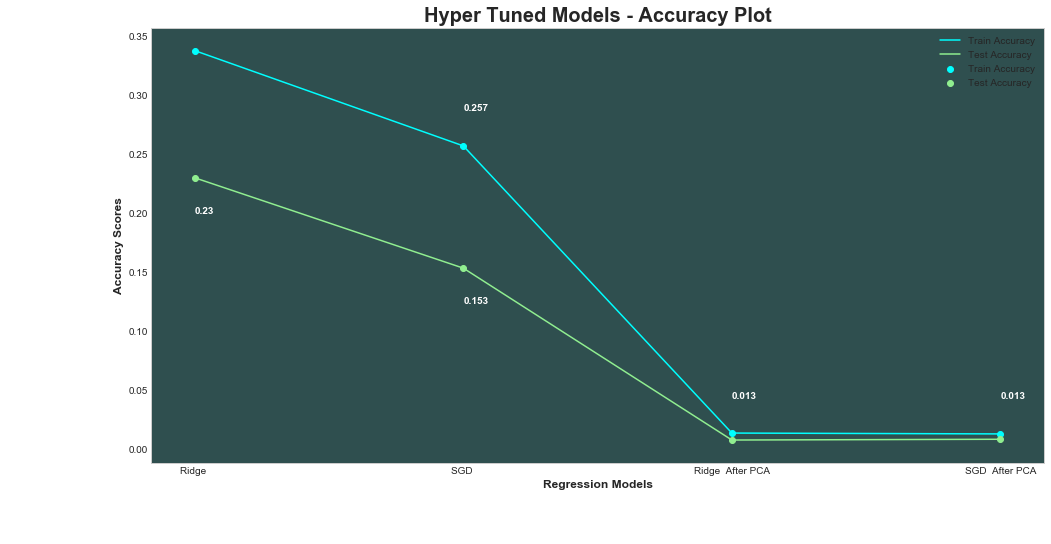

In [131]:
%matplotlib inline
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111,facecolor='darkslategray')
ax.plot(report['identifier'], report['Train Accuracy'], c = 'cyan')
ax.plot(report['identifier'], report['Test Accuracy'], c = 'lightgreen')
ax.scatter(report['identifier'], report['Train Accuracy'], c = 'cyan')
ax.scatter(report['identifier'], report['Test Accuracy'], c = 'lightgreen')
for i,j in zip(report['identifier'],round(report['Train Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j+0.03),color='white',weight='bold')
for i,j in zip(report['identifier'],round(report['Test Accuracy'],3)):
    ax.annotate(str(j),xy=(i,j-0.03),color='white',weight='bold')
ax.legend()
ax.set_title('Hyper Tuned Models - Accuracy Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=12,weight='bold')
ax.set_ylabel('Accuracy Scores',fontsize=12,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.grid()
plt.show()

### Conclusion

- After dimensionality reduction using PCA, applying Ridge and SGD regression models on reduced dataset results in decrease in accuracy.

- Fitting Ridge and SGD regression models on the entire dataset is efficient compared to fitting them on the reduced dataset (PCA).

- Ridge regression gives better accuracy score compared to SGD regression when fitted on the entire dataset. Also, Ridge regression is a regularization techniques which will retain all the features by shrinking the coefficients and prevents overfitting of training data.
